In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(-0.002, 0.03)

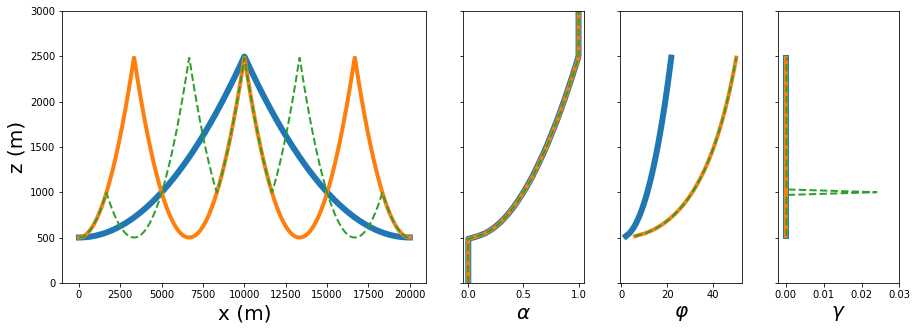

In [23]:
nx = 1200
nz = 100
L = 20000
x = np.linspace(0,L,nx)

z1,z2 = 500,2500
#z = np.linspace(z1,z2,nz)
z = np.linspace(0,3000,nz)

def zs(x,zmin,zmax):
    return zmin+ (zmax-zmin)*x**2

def dzsdx(z,zmin,zmax):
    return 2*(zmax-zmin)*np.sqrt((z-zmin)/(zmax-zmin) )

def zs1(x,z):
    N = 2
    xp = x[x<L/N]
    zsp = zs(xp*N/L,z1,z2)
    zsm = zsp[::-1]
    return np.concatenate((zsp,zsm)) ,180/np.pi * np.arctan( dzsdx(z,z1,z2)*N/L )
def zs2(x,z):
    N = 6
    xp = x[x<L/N]
    zsp = zs(xp*N/L,z1,z2)
    zsm = zsp[::-1]
    return np.concatenate((zsp,zsm,zsp,zsm,zsp,zsm)) ,180/np.pi * np.arctan( dzsdx(z,z1,z2)*N/L )

def zs3(x,z):
    N = 12
    xp = x[x<L/N]
    zspb = zs(xp/2*N/L,z1,z2)
    zsnb = zspb[::-1]
    
    zsph = zs((1/2+xp/2*N/L),z1,z2)
    zsnh = zsph[::-1]
    return np.concatenate((zspb,zsnb,zspb,zsph,zsnh,zsph,zsnh,zsph,zsnh,zsnb,zspb,zsnb)) ,180/np.pi * np.arctan( dzsdx(z,z1,z2)*N/L/2 )

def get_alpha(z,zs):
    return np.array([np.mean(zs<zi) for zi in z ])

def get_phi(z,zs_x):
    dz = z[1]-z[0]
    z_bins = np.append(z-dz/2,z[-1]+dz/2)
    slopes = np.abs(zs_x[1:]-zs_x[:-1])/(x[1:]-x[:-1])
    slope_bins = np.linspace(0.,np.max(slopes),1000)
    hist_field,_,_,imhs = plt.hist2d(slopes,(zs_x[1:]+zs_x[:-1])/2,bins=(slope_bins,z_bins),visible=False)
    hist_mean_slopes = np.sum(hist_field * (slope_bins[1:]/2+slope_bins[:-1]/2).reshape((len(slope_bins)-1,1)) ,axis=0 )/np.sum(hist_field,axis=0)
    return 180/np.pi*np.arctan(hist_mean_slopes)

def get_gamma(z,zs_x):
    dx = x[1]-x[0]
    dz = z[1]-z[0]
    z_bins = np.append(z-dz/2,z[-1]+dz/2)
    
    
    slopes = (zs_x[2:]+zs_x[:-2]-2*zs_x[1:-1])/dx**2
    #print(np.min(slopes),np.max(slopes))
    slope_bins = np.linspace(np.min(slopes),np.max(slopes),15000)
    hist_field,_,_,imhs = plt.hist2d(slopes,zs_x[1:-1],bins=(slope_bins,z_bins),visible=False)
    hist_mean_laplas = np.sum(hist_field * (slope_bins[1:]/2+slope_bins[:-1]/2).reshape((len(slope_bins)-1,1)) ,axis=0 )/np.sum(hist_field,axis=0)
    
    slopes = (zs_x[2:]+zs_x[:-2]-2*zs_x[1:-1])**2/dx**4
    #print(np.min(slopes),np.max(slopes))
    slope_bins = np.linspace(0.,np.max(slopes),15000)
    hist_field,_,_,imhs = plt.hist2d(slopes,zs_x[1:-1],bins=(slope_bins,z_bins),visible=False)
    hist_mean_lapla2s = np.sum(hist_field * (slope_bins[1:]/2+slope_bins[:-1]/2).reshape((len(slope_bins)-1,1)) ,axis=0 )/np.sum(hist_field,axis=0)
    #print(hist_mean_lapla2s,hist_mean_laplas)
    return np.sqrt( hist_mean_lapla2s - hist_mean_laplas**2)#

ft = 20
fig2,axs = plt.subplots(ncols=4, figsize=(15,5),gridspec_kw={'width_ratios': [3, 1,1,1]})
ax=axs[0]
ax.set_ylim([0,3000])
ax.set_xlabel('x (m)',fontsize=ft)
ax.set_ylabel('z (m)',fontsize=ft)
for i,zsi in enumerate([zs1,zs2,zs3]):
    zs_x,phi_z = zsi(x,z)
    lw = 6-2*i
    ls = '--' if i==2 else '-'
    ax.plot(x,zs_x,linewidth=lw,linestyle=ls)

    
    axs[1].plot(get_alpha(z,zs_x),z,linewidth=lw,linestyle=ls)
    axs[2].plot(phi_z[z<=z2],z[z<=z2],linewidth=lw,linestyle=ls)
    #axs[2].plot(get_phi(z,zs_x),z,linewidth=lw,linestyle=ls)
    if i in [0,1]:
        axs[3].plot(0*get_gamma(z,zs_x),z,linewidth=lw,linestyle=ls)
    else:
        axs[3].plot(get_gamma(z,zs_x),z,linewidth=lw,linestyle=ls)

for i in range(4):
    axs[i].set_ylim([0,3000])
    if i>0:
        axs[i].set_yticklabels([])
axs[1].set_xlabel('$\\alpha$',fontsize=ft)
axs[2].set_xlabel('$\\varphi$',fontsize=ft)
axs[3].set_xlabel('$\\gamma$',fontsize=ft)
axs[3].set_xlim([-0.002,0.03])